# Pymaceuticals Inc.
---

### Analysis

- The top two drug regimens for mortality rates were Capomulin and Ramicane.
  Sample data from Capomulin showed a significant decrease in tumor size by the final timepoint.
  There is a positive correlation between weight and tumor size.
 

In [184]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

#print(mouse_metadata.columns)
#print(study_results.columns)
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [185]:
# Checking the number of mice.
#combined_data["Mouse ID"].value_counts().sum()
len(combined_data["Mouse ID"].unique())

249

In [69]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = combined_data[combined_data.duplicated(subset=["Mouse ID", 
                                                    "Timepoint"], keep=False)]
duplicate_mouse = duplicate_rows["Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [70]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = combined_data.loc[combined_data["Mouse ID"]=="g989",:]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [191]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_frame = combined_data.loc[combined_data["Mouse ID"]!="g989",:]

In [192]:
# Checking the number of mice in the clean DataFrame.
print("No. of unique mice: " + str(len(cleaned_data_frame["Mouse ID"].unique())))
print("No. of mice in total: " + str(cleaned_data_frame["Mouse ID"].count()))

No. of unique mice: 248
No. of mice in total: 1880


## Summary Statistics

In [193]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_data_frame.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = cleaned_data_frame.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = cleaned_data_frame.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = cleaned_data_frame.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = cleaned_data_frame.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_method1 = pd.DataFrame({"Mean Tumor Volume" : mean, 
                               "Median Tumor Volume" : median,
                               "Tumor Volume Variance" : var,
                                "Tumor Volume Std. Dev." : std, 
                               "Tumor Volume Std. Err." : sem})
summary_method1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [194]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_method2 = cleaned_data_frame.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

columns = pd.MultiIndex.from_tuples([("Tumor Volume (mm3)", "mean"), 
                                                  ("Tumor Volume (mm3)", "median"),
                                                  ("Tumor Volume (mm3)", "var"),
                                                  ("Tumor Volume (mm3)", "std"),
                                                  ("Tumor Volume (mm3)", "sem")])

# The first value in each of the 5 tuples above is the header, and the second part is the column above which the header sits. Presumably, 
# if all columns have the same header, then that header is only printed once across the top of the frame

summary_method2.columns = columns # this assigns the MultiIndex to the data frame's columns
summary_method2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

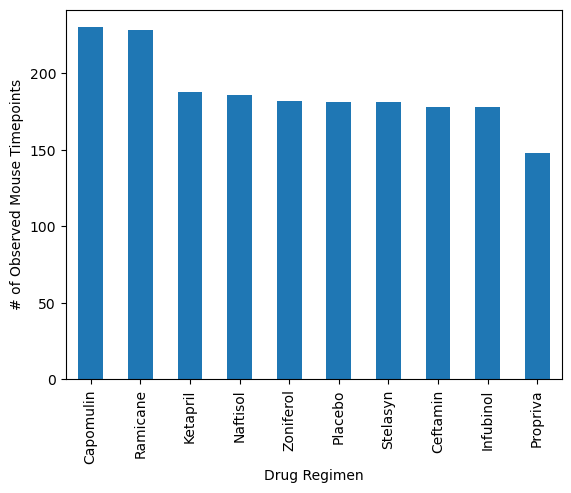

In [195]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_rows1 = cleaned_data_frame.groupby("Drug Regimen")["Mouse ID"].count()
sorted_rows = total_rows1.sort_values(ascending=False)
sorted_rows.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")
plt.show()


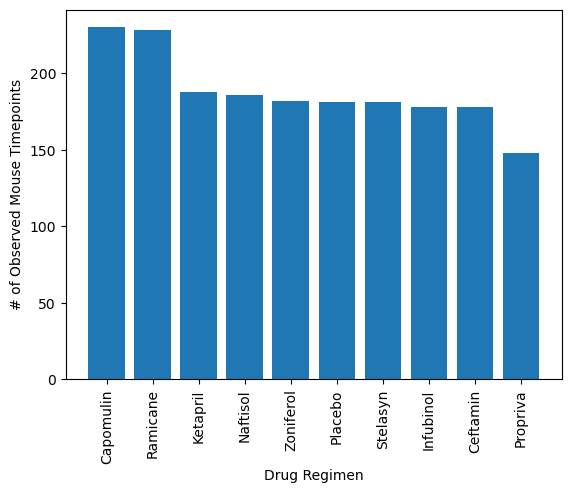

In [196]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

total_rows2 = cleaned_data_frame['Drug Regimen'].value_counts()
x_axis = total_rows2.index
plt.bar(x_axis, total_rows2)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

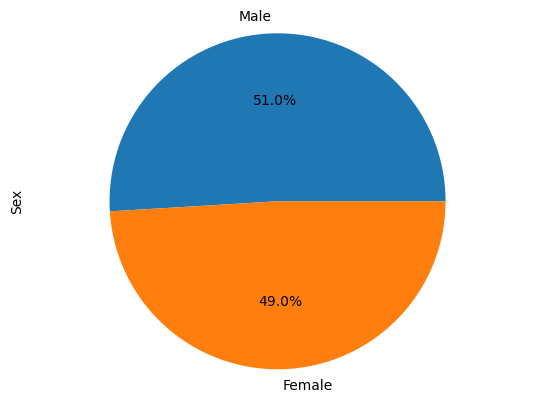

In [197]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_female_dist = cleaned_data_frame["Sex"].value_counts()
#print(male_female_dist)

male_female_dist.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.show()

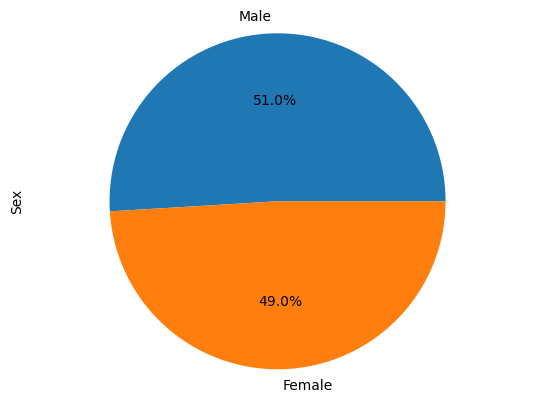

In [198]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count = cleaned_data_frame["Sex"].value_counts()
sex = cleaned_data_frame["Sex"].unique()
#sex = ["Males", "Female"]
#count = [958, 922]

colors = ["tab:blue", "tab:orange"]
explode = (0,0)

plt.pie(count, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [199]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_df= cleaned_data_frame.groupby("Mouse ID")["Timepoint"].max().reset_index()
#print(max_timepoint_df)

#max_timepoint = cleaned_data_frame.groupby("Mouse ID")["Timepoint"].idxmax() # idxmax finds the row where the greatest timepoint for each mouse occurs
#full_row_data = cleaned_data_frame.loc[max_timepoint] # then we assign the filtered rows to a new data frame
#filtered_row_data = full_row_data.loc[(full_row_data["Drug Regimen"]=="Capomulin")|(full_row_data["Drug Regimen"]=="Ramicane")|(full_row_data["Drug Regimen"]=="Infubinol")|(full_row_data["Drug Regimen"]=="Ceftamin")]
#full_row_data = full_row_data.reset_index(drop=True)            
#full_row_data

#final_tumor_volume_df = final_volume_filtered[["Mouse ID", "Tumor Volume (mm3)"]]
#filtered_row_data = filtered_row_data.reset_index(drop=True)
#filtered_row_data

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(cleaned_data_frame, max_timepoint_df, on=["Mouse ID", "Timepoint"], how="right")
merged_data = merged_data.rename(columns={"Tumor Volume (mm3)_x" : "Tumor Volume (mm3)",
                                         "Mouse ID" : "Mouse ID", "Drug Regimen" : "Drug Regimen",
                                         "Sex" : "Sex", "Age_months" : "Age_months", 
                                         "Weight (g)" : "Weight (g)", "Timepoint" : "Timepoint", 
                                          "Metastatic Sites" : "Metastatic Sites"})                                                                                                         
merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [200]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

TumorVol_Data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for t in Treatments:
    tumor_vols = merged_data.loc[merged_data["Drug Regimen"]==t, "Tumor Volume (mm3)"] # assign to variable
    TumorVol_Data.append(tumor_vols) # place variable in list
    quartile = tumor_vols.quantile([.25,.5,.75]) # cannot perform function on list so perform function on variable
    lower_quartile = quartile[0.25]
    upper_quartile = quartile[0.75]
    inter_quartile_range = upper_quartile-lower_quartile
    lower_bound = lower_quartile - (1.5*inter_quartile_range)
    upper_bound = upper_quartile + (1.5*inter_quartile_range)
    
    print(f"The interquartile range for {t} is : {inter_quartile_range}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")



The interquartile range for Capomulin is : 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The interquartile range for Ramicane is : 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The interquartile range for Infubinol is : 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The interquartile range for Ceftamin is : 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


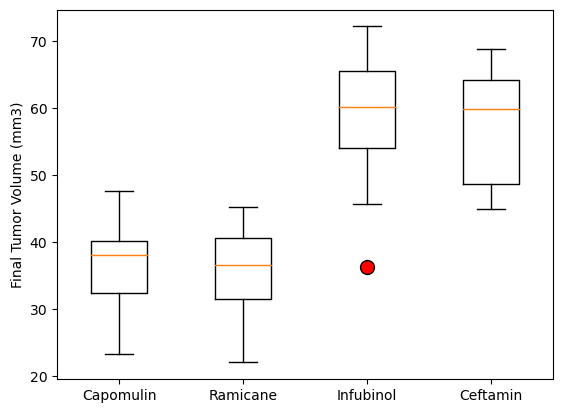

In [201]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(Treatments)
#ax1.set_xlabel("Drug Regimen")
ax1.boxplot(TumorVol_Data, flierprops=dict(marker="o", markerfacecolor="red", markersize=10))
plt.show()



## Line and Scatter Plots

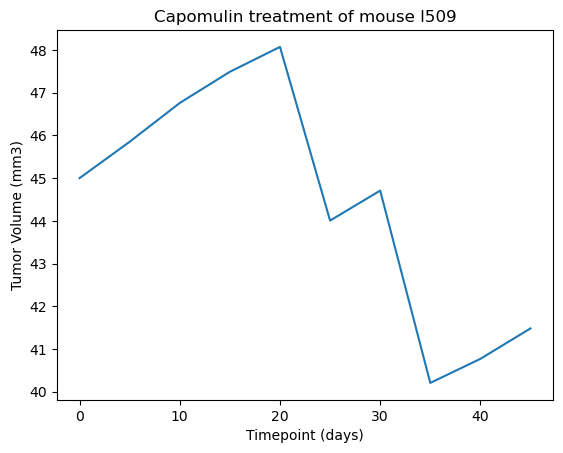

In [202]:
t_point = cleaned_data_frame.loc[cleaned_data_frame["Mouse ID"]=="l509", ["Timepoint"]]
t_vol = cleaned_data_frame.loc[cleaned_data_frame["Mouse ID"]=="l509", ["Tumor Volume (mm3)"]]

mouse_l509 = plt.plot(t_point, t_vol, color="tab:blue") 
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

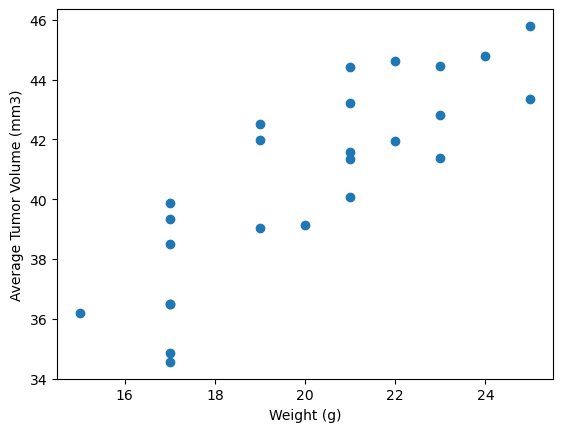

In [203]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_data = cleaned_data_frame.loc[cleaned_data_frame["Drug Regimen"]=="Capomulin"]
avg_t_vol = capo_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capo_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(weight, avg_t_vol, marker="o", color="tab:blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

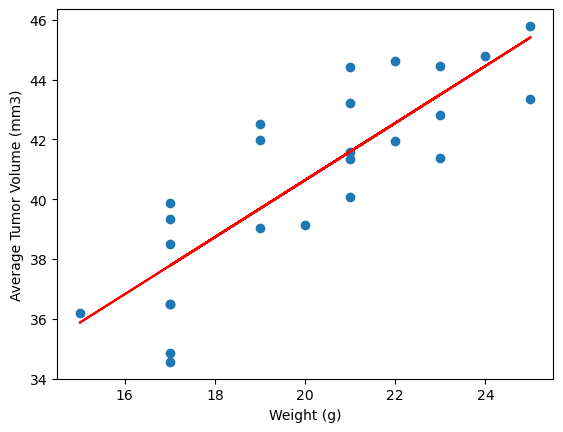

In [204]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_t_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avg_t_vol, marker="o", color="tab:blue")
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

